In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import utils

In [4]:
# survival_by_type= pd.read_csv('Resources/survival_donor_type_df.csv')
survival_by_age= pd.read_csv('Resources/survival_age_df.csv')
survival_by_diagnoses= pd.read_csv('Resources/survival_diagnose_df.csv')
# cost_by_type= pd.read_csv('Resources/type-by-money.csv')


# survival_by_type.head()
survival_by_diagnoses.head()
# cost_by_type.head()
# print(len(cost_by_type))
# print(len(survival_by_diagnoses))
# print(len(survival_by_age))

,_id,Region,Organ,Recipient_Diagnose_Category,Years_Post_Transplant,Number_Functioning_or_Alive,Survival_Rate
0,6032c59837ca244bc48d667e,U.S.,Heart,Cardiomyopathy,1 Year,5035,92.0
1,6032c59837ca244bc48d667f,U.S.,Heart,Coronary Artery Disease,1 Year,2803,89.9
2,6032c59837ca244bc48d6680,U.S.,Heart,Retransplant/Graft Failure,1 Year,310,86.2
3,6032c59837ca244bc48d6681,U.S.,Heart,Valvular Heart Disease,1 Year,110,91.0
4,6032c59837ca244bc48d6682,U.S.,Heart,Other,1 Year,187,94.5


In [9]:
# merged_inner = pd.merge(left=survival_by_diagnoses, right=survival_by_age, 
#                         left_on='Organ', right_on='Organ')
# merged_inner.dropna().head()

concat_df= pd.concat([survival_by_diagnoses, survival_by_age], ignore_index=True)
concat_df

,_id,Region,Organ,Recipient_Diagnose_Category,Years_Post_Transplant,Number_Functioning_or_Alive,Survival_Rate,Recipient_Age
0,6032c59837ca244bc48d667e,U.S.,Heart,Cardiomyopathy,1 Year,5035,92.0,NaN
1,6032c59837ca244bc48d667f,U.S.,Heart,Coronary Artery Disease,1 Year,2803,89.9,NaN
2,6032c59837ca244bc48d6680,U.S.,Heart,Retransplant/Graft Failure,1 Year,310,86.2,NaN
3,6032c59837ca244bc48d6681,U.S.,Heart,Valvular Heart Disease,1 Year,110,91.0,NaN
4,6032c59837ca244bc48d6682,U.S.,Heart,Other,1 Year,187,94.5,NaN
...,...,...,...,...,...,...,...,...
185,6032c56537ca244bc48d6679,U.S.,Pancreas,NaN,5 Year,52,55.7,1-5 Years
186,6032c56537ca244bc48d667a,U.S.,Pancreas,NaN,5 Year,13,65.0,6-10 Years
187,6032c56537ca244bc48d667b,U.S.,Pancreas,NaN,5 Year,115,44.7,18-34 Years
188,6032c56537ca244bc48d667c,U.S.,Pancreas,NaN,5 Year,396,63.1,35-49 Years


In [20]:

# joined_df.groupby(by= ['Survival_Rate'], dropna= False)

X= concat_df.drop(columns=['_id', 'Region', 'Survival_Rate', 'Recipient_Age' ], axis=0)
y= concat_df['Survival_Rate'].values.reshape(-1,1)
# y.head()
X.head(20)

,Organ,Recipient_Diagnose_Category,Years_Post_Transplant,Number_Functioning_or_Alive
0,Heart,Cardiomyopathy,1 Year,5035
1,Heart,Coronary Artery Disease,1 Year,2803
2,Heart,Retransplant/Graft Failure,1 Year,310
3,Heart,Valvular Heart Disease,1 Year,110
4,Heart,Other,1 Year,187
5,Heart,Cardiomyopathy,3 Year,4183
6,Heart,Congenital Heart Disease,3 Year,11
7,Heart,Coronary Artery Disease,3 Year,2495
8,Heart,Retransplant/Graft Failure,3 Year,282
9,Heart,Valvular Heart Disease,3 Year,108


In [21]:
print(X.shape, y.shape)
# X.dtypes

(190, 4) (190, 1)


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

transformed_X = X.apply(lambda col: label_encoder.fit_transform(col.astype(str)), 
                        axis=0, result_type='expand')
transformed_X

,Organ,Recipient_Diagnose_Category,Years_Post_Transplant,Number_Functioning_or_Alive
0,0,3,0,127
1,0,7,0,81
2,0,20,0,86
3,0,22,0,7
4,0,16,0,54
...,...,...,...,...
185,4,23,2,129
186,4,23,2,24
187,4,23,2,11
188,4,23,2,107


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.33, random_state = 42)

X_train



,Organ,Recipient_Diagnose_Category,Years_Post_Transplant,Number_Functioning_or_Alive
139,2,23,0,40
2,0,20,0,86
46,2,11,0,1
96,0,23,0,128
140,2,23,0,142
...,...,...,...,...
106,0,23,1,29
14,0,20,2,63
92,4,16,2,38
179,4,23,1,114


In [80]:
from sklearn.preprocessing import MinMaxScaler

# X_train_broadcasted= X_train*y_train_encoded
# X_train_broadcasted
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler= MinMaxScaler().fit(y_train)
y_train_scaled= y_scaler.transform(y_train).reshape(-1,1)
y_test_scaled= y_scaler.transform(y_test)
X_train_scaled
# print(X_train_scaled.shape, y_train_scaled.shape)

array([[0.5  , 1.   , 0.   , 0.227],
       [0.   , 0.857, 0.   , 0.489],
       [0.5  , 0.429, 0.   , 0.006],
       [0.   , 1.   , 0.   , 0.727],
       [0.5  , 1.   , 0.   , 0.807],
       [0.25 , 1.   , 0.   , 0.403],
       [0.25 , 0.19 , 1.   , 0.21 ],
       [0.5  , 1.   , 0.   , 0.858],
       [0.25 , 0.762, 0.   , 0.773],
       [0.   , 1.   , 1.   , 0.472],
       [0.75 , 0.714, 1.   , 0.409],
       [1.   , 1.   , 0.5  , 0.074],
       [0.   , 0.048, 1.   , 0.557],
       [0.   , 1.   , 1.   , 0.784],
       [0.75 , 1.   , 0.   , 0.642],
       [0.   , 0.143, 0.5  , 0.034],
       [0.25 , 0.19 , 0.5  , 0.273],
       [0.   , 1.   , 0.   , 0.222],
       [0.   , 0.667, 0.   , 0.307],
       [0.25 , 0.81 , 0.5  , 1.   ],
       [0.   , 1.   , 0.5  , 0.08 ],
       [0.25 , 1.   , 1.   , 0.312],
       [1.   , 0.857, 1.   , 0.932],
       [0.25 , 1.   , 1.   , 0.148],
       [0.   , 0.667, 0.5  , 0.347],
       [0.25 , 1.   , 0.5  , 0.716],
       [0.25 , 1.   , 0.5  , 0.182],
 

In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled , y_train_scaled)


LinearRegression()

In [126]:
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.506791490789936
Testing Score: 0.43300308123865827


In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions


# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X_train_scaled, y_train_scaled)

# summarize scores
set_printoptions(precision=3)
# print(fit.scores_)
features = fit.transform(X_train_scaled)

# print(features[0:5,:])

/Users/yaden/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Slope:  [[-0.173 -0.138 -0.279  0.134]]
Intercept:  [0.979]
Root mean Squared Error (MSE): 0.01388387639176019
R-squared (R2 ): 0.43300308123865827


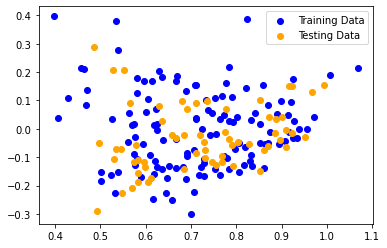

In [132]:
# Calculating the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use model to make predictions
y_predicted = model.predict(X_test_scaled)

# # Score predictions with mse and r2
rmse = mean_squared_error(y_test_scaled, y_predicted)
r2 = r2_score(y_test_scaled, y_predicted)

print(f"Slope: ", model.coef_)
print('Intercept: ', model.intercept_)
print(f"Root mean Squared Error (MSE): {rmse}")
print(f"R-squared (R2 ): {r2}")
# 
train_predict= plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
test_predict= plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

# plt.scatter(X_test_scaled, y_test_scaled, s=5)
# plt.plot(y_predicted, color='r')
plt.show()


In [133]:
model.score(X_test_scaled, y_test_scaled)

0.43300308123865827

In [134]:
from sklearn.ensemble import RandomForestRegressor

# Random forest to fit a number of classifying decision 
# trees on subsample of dataset.
# Uses averaging to improve the predictive accuracy and control over-fitting.

model_1 = RandomForestRegressor(n_estimators=200)
model_1.fit(X_train_scaled, y_train_scaled)

model_1_training_score = round(model_1.score(X_train_scaled, y_train_scaled)*100,3)

base_accuracy = round(model_1.score(X_test_scaled, y_test_scaled)*100,3)

print(f"Training Data Score: {model_1_training_score} %")
print(f"Testing Data Score: {base_accuracy} %")

<ipython-input-134-b1045dfd65c6>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_scaled, y_train_scaled)


Training Data Score: 93.373 %
Testing Data Score: 48.636 %


In [151]:
importances = model_1.feature_importances_
importances

array([0.275, 0.113, 0.339, 0.273])

In [159]:
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train_scaled, y_train)
# clf.score(X_test, y_test)